In [51]:
# load required libraries
# R version 4.2.3
library(stats) # v4.2.3
library(tidyverse) # v2.0.0
library(svglite) # v2.1.1

# create plotting function
plot_bracken <- function(file, top = NA, pal, otherColor){
    
    # file is the bracken data
    # top is an integer, trims the data to the number of top taxa (by median) in a given level for better plotting
    ## top = NA is the default and will plot all taxa in a given level
    # pal is a palette of hex colors
    # otherColor is the color used to represent taxa below median abundance threshold
    
    levdat <-
      dplyr::select(file,
                    -contains(c("_num","taxonomy_"))) |>
      tidyr::pivot_longer(cols = !name,
                          names_to = "sample",
                          values_to = "fraction") |>
      dplyr::mutate(sample = str_remove_all(sample, "_frac"))
    
    level <-
      dplyr::select(file,
                    contains("taxonomy_lvl")) |>
      unique()
    
    newpal <-
      paste0("#",
             stringr::str_split(pal, ",") |> unlist()
      )
    
    if (level == "K") {
        label <- "Kingdom"
    } else if (level == "P") {
        label <- "Phylum"
    } else if (level == "C") {
        label <- "Class"
    } else if (level == "O") {
        label <- "Order"
    } else if (level == "F") {
        label <- "Family"
    } else if (level == "G") {
        label <- "Genus"
    } else if (level == "S") {
        label <- "Species"
    } else if (level == "S1") {
        label <- "Strain"
    } else {
        message("Bracken taxonomy_lvl needs to be K, P, C, O, F, G, S, or S1")
    }
    
    if (!is.na(top) && top < length(unique(levdat$name))) {
        
        top_select <-
          stats::aggregate(x = levdat$fraction,
                           by = list(levdat$name),
                           FUN = median) |>
          purrr::set_names(c("group","value")) |>
          dplyr::arrange(dplyr::desc(value)) |>
          dplyr::slice(1:top) |>
          dplyr::pull(var = group)
        
        levdat <- dplyr::filter(levdat, levdat$name %in% top_select)
        
        fill_unk <-
          stats::aggregate(x = levdat$fraction,
                           by = list(levdat$sample),
                           FUN = sum) |> 
          purrr::set_names(c("sample","sum")) |> 
          dplyr::mutate_if(is.numeric, round, 3)
        
        fill_unk$residual <- 1 - fill_unk$sum
        
        for (i in 1:nrow(fill_unk)) {
            
            levdat <- rbind(levdat, c("other", fill_unk[i,1], fill_unk[i,3]))
            
        }
        
        levdat <- transform(levdat, fraction = as.numeric(fraction))
        levdat$name <- factor(levdat$name, levels = unique(levdat$name))
        
        fill_vals <- c(rep_len(newpal, nrow(unique(levdat[1]))-1), otherColor)
        
    } else {
        
        fill_vals <- c(rep_len(newpal, nrow(unique(levdat[1]))))
        
    }
    
    print(nrow(levdat))
    
    ggplot2::ggplot(data = levdat) +
      ggplot2::geom_bar(mapping = ggplot2::aes(x = sample,
                                                 y = fraction,
                                                 fill = name),
                        position = "fill",
                        stat = "identity",
                        width = 0.75) + 
      ggplot2::scale_fill_manual(paste(label),
                                 values = fill_vals) +
      ggplot2::theme_classic() +
      ggplot2::scale_x_discrete("") +
      ggplot2::scale_y_continuous("Relative Abundance") +
      ggplot2::theme(axis.text.x = element_text(angle = -90, vjust = 0.5, hjust = 1, size = 15),
              axis.text.y = element_text(size = 12),
              axis.title.x = element_text(),
              axis.title.y = element_text(size = 15),
              legend.position = "right", 
              legend.text = element_text(size = 15))
    
    
    
}

[1] 88


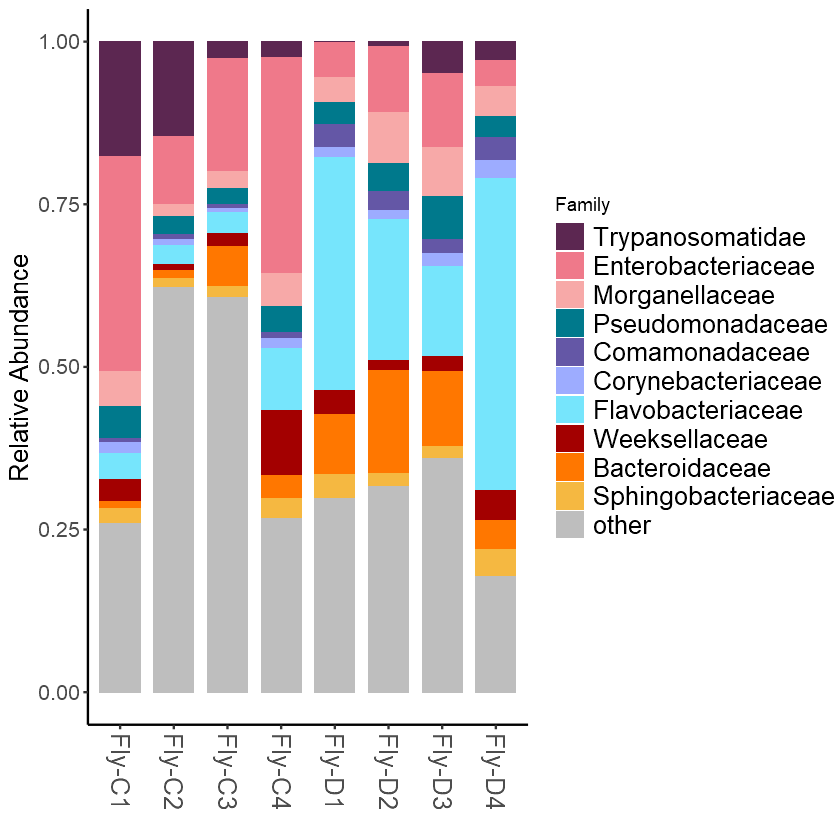

In [52]:
# create plot
# specify coltypes to prevent F character (family) from being read as logical FALSE
notLogical <- cols(taxonomy_lvl = col_character())
p1 <- plot_bracken(file = readr::read_tsv(file = "bracken/F/merged_bracken_F_fixed.bracken.txt",
                                          col_names = TRUE,
                                          col_types = notLogical),
                   top = 10,
                   pal = "5c2751,ef798a,f7a9a8,00798c,6457a6,9dacff,76e5fc,a30000,ff7700,f5b841",
                   otherColor = "gray")


p1 

In [53]:
# save as svg, pdf
ggsave(filename = "plots/bracken_plot_F.svg",
       plot = p1, units = "in",
       width = 10,
       height = 6)

ggsave(filename = "plots/bracken_plot_F.pdf",
       plot = p1, units = "in",
       width = 10,
       height = 6)

[1] 88


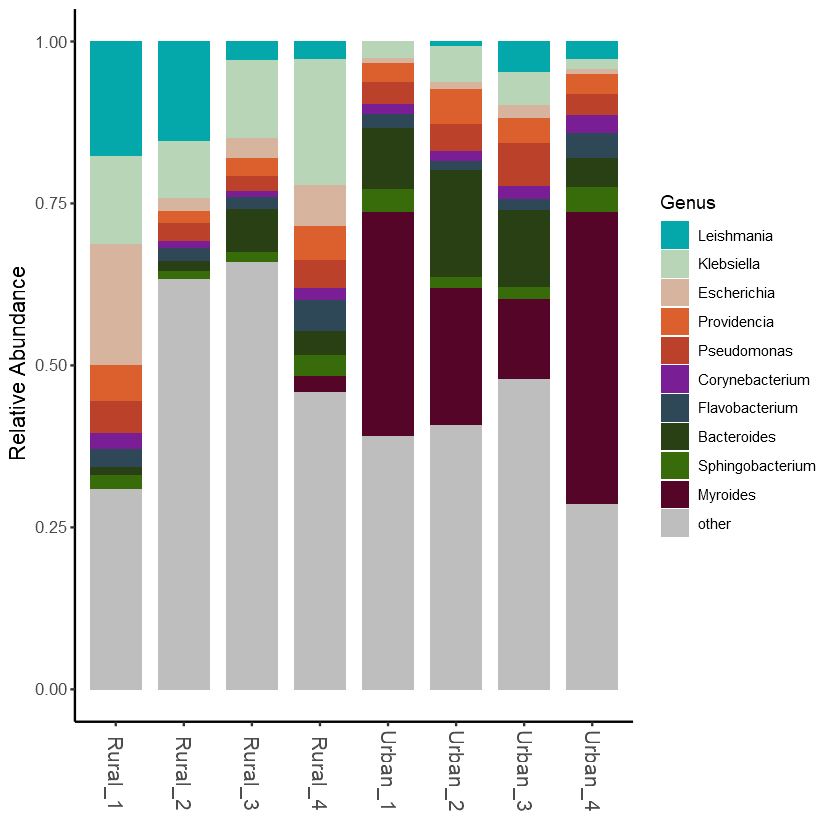

In [4]:
# create plot
# specify coltypes to prevent F character (family) from being read as logical FALSE
notLogical <- cols(taxonomy_lvl = col_character())
p1 <- plot_bracken(file = readr::read_tsv(file = "bracken/G/merged_bracken_G_fixed.bracken.txt",
                                          col_names = TRUE,
                                          col_types = notLogical),
                   top = 10,
                   pal = "05a8aa,b8d5b8,d7b49e,dc602e,bc412b,791e94,2f4858,293f14,386c0b,550527",
                   otherColor = "gray")

p1 

In [5]:
# save as svg, pdf
ggsave(filename = "plots/bracken_plot_G.svg",
       plot = p1, units = "in",
       width = 10,
       height = 6)

ggsave(filename = "plots/bracken_plot_G.pdf",
       plot = p1, units = "in",
       width = 10,
       height = 6)

[1] 88


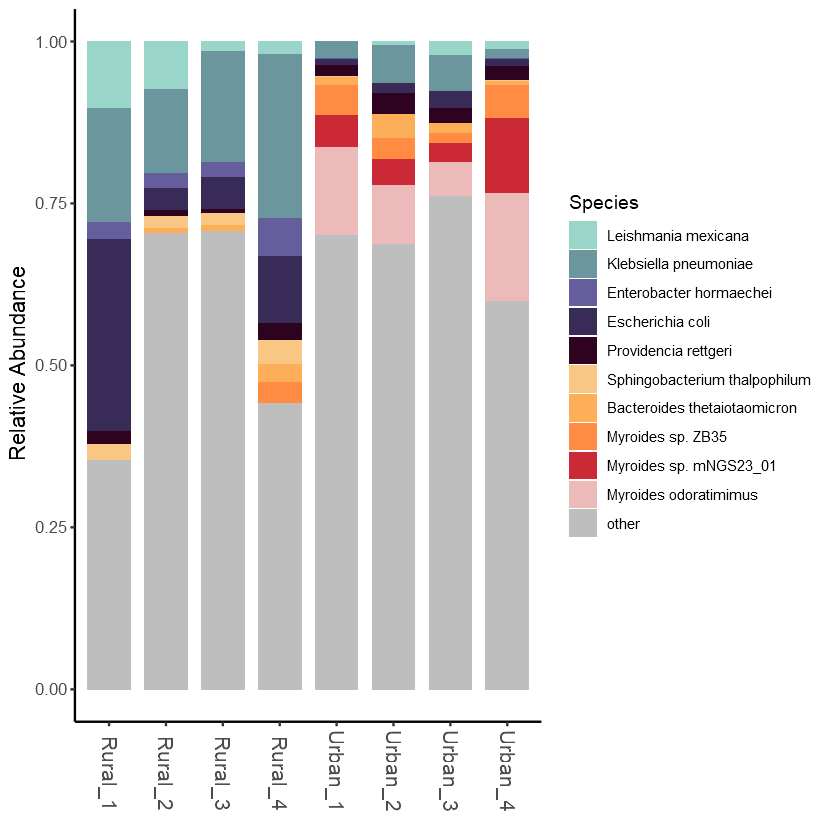

In [6]:
# create plot
# specify coltypes to prevent F character (family) from being read as logical FALSE
notLogical <- cols(taxonomy_lvl = col_character())
p1 <- plot_bracken(file = readr::read_tsv(file = "bracken/S/merged_bracken_S_fixed.bracken.txt",
                                          col_names = TRUE,
                                          col_types = notLogical),
                   top = 10,
                   pal = "99d5c9,6c969d,645e9d,392b58,2d0320,f9c784,fcaf58,ff8c42,cc2936,ebbab9",
                   otherColor = "gray")

p1 

In [7]:
# save as svg, pdf
ggsave(filename = "plots/bracken_plot_S.svg",
       plot = p1, units = "in",
       width = 10,
       height = 6)

ggsave(filename = "plots/bracken_plot_S.pdf",
       plot = p1, units = "in",
       width = 10,
       height = 6)

In [8]:
library('tidyverse')
library('vegan')
library('coin')
library('pheatmap')

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Loading required package: survival



In [9]:
brel= readr::read_tsv(file = "bracken/S/merged_bracken_S_fixed.bracken.txt",
                                          col_names = TRUE,
                                          col_types = notLogical)
brel[is.na(brel)] <- 0

In [10]:
head(brel)

name,taxonomy_id,taxonomy_lvl,Rural_1_num,Rural_1_frac,Rural_2_num,Rural_2_frac,Rural_3_num,Rural_3_frac,Rural_4_num,Rural_4_frac,Urban_1_num,Urban_1_frac,Urban_2_num,Urban_2_frac,Urban_3_num,Urban_3_frac,Urban_4_num,Urban_4_frac
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Leishmania mexicana,5665,S,105,0.10284035,296,0.07431584,38,0.01479175,24,0.02068966,0,0.00000000,31,0.006473168,167,0.021027449,305,0.011692095
Leishmania major,5664,S,65,0.06366307,178,0.04468993,32,0.01245621,0,0.00000000,0,0.00000000,0,0.000000000,85,0.010702594,161,0.006171893
Leishmania panamensis,5679,S,38,0.03721841,138,0.03464725,0,0.00000000,0,0.00000000,0,0.00000000,0,0.000000000,84,0.010576681,134,0.005136855
Leishmania braziliensis,5660,S,23,0.02252693,78,0.01958323,0,0.00000000,0,0.00000000,0,0.00000000,0,0.000000000,34,0.004281038,79,0.003028444
Trypanosoma brucei,5691,S,48,0.04701273,66,0.01657042,0,0.00000000,0,0.00000000,0,0.00000000,0,0.000000000,27,0.003399647,64,0.002453423
Klebsiella pneumoniae,573,S,181,0.17727718,518,0.13005272,442,0.17205138,293,0.25258621,556,0.02586046,281,0.058676133,449,0.056534878,382,0.014643870


In [11]:
brel_spec<-subset(brel, taxonomy_lvl == "S") %>% 
  select(-c("taxonomy_id","taxonomy_lvl")) %>%
  filter(rowSums(select_if(., is.numeric)) != 0) %>%
  select(-matches("_num"))
head(brel_spec)

name,Rural_1_frac,Rural_2_frac,Rural_3_frac,Rural_4_frac,Urban_1_frac,Urban_2_frac,Urban_3_frac,Urban_4_frac
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Leishmania mexicana,0.10284035,0.07431584,0.01479175,0.02068966,0.00000000,0.006473168,0.021027449,0.011692095
Leishmania major,0.06366307,0.04468993,0.01245621,0.00000000,0.00000000,0.000000000,0.010702594,0.006171893
Leishmania panamensis,0.03721841,0.03464725,0.00000000,0.00000000,0.00000000,0.000000000,0.010576681,0.005136855
Leishmania braziliensis,0.02252693,0.01958323,0.00000000,0.00000000,0.00000000,0.000000000,0.004281038,0.003028444
Trypanosoma brucei,0.04701273,0.01657042,0.00000000,0.00000000,0.00000000,0.000000000,0.003399647,0.002453423
Klebsiella pneumoniae,0.17727718,0.13005272,0.17205138,0.25258621,0.02586046,0.058676133,0.056534878,0.014643870


In [12]:
# To ensure reproducibility we can fix the seed here. This will ensure you always get the same result each time you run your data.
set.seed(34521)

# Data mingling
brel_spec_gg2 <- brel_spec %>% 
  column_to_rownames("name") %>% 
  t() # transpose

# Calculate distance matrix
brel_spec_gg2_dist <- vegdist(brel_spec_gg2, method = "bray")

# Perform NMDS on distance matrix
nmds_spec<-metaMDS(brel_spec_gg2_dist,distance = "bray",k = 2)

# Check the output
nmds_spec

Run 0 stress 9.247795e-05 
Run 1 stress 9.394427e-05 
... Procrustes: rmse 0.1344369  max resid 0.2676181 
Run 2 stress 9.053029e-05 
... New best solution
... Procrustes: rmse 0.134425  max resid 0.2676382 
Run 3 stress 0.0002026709 
... Procrustes: rmse 0.1075032  max resid 0.2094667 
Run 4 stress 9.968903e-05 
... Procrustes: rmse 0.02810574  max resid 0.05625943 
Run 5 stress 9.787636e-05 
... Procrustes: rmse 0.1648991  max resid 0.3089465 
Run 6 stress 8.943911e-05 
... New best solution
... Procrustes: rmse 1.561321e-05  max resid 2.706373e-05 
... Similar to previous best
Run 7 stress 9.037287e-05 
... Procrustes: rmse 0.1503305  max resid 0.285021 
Run 8 stress 0.0003975871 
... Procrustes: rmse 0.1017194  max resid 0.1987697 
Run 9 stress 0.0003661657 
... Procrustes: rmse 0.1088786  max resid 0.2119916 
Run 10 stress 0.0007656783 
Run 11 stress 0.0001529055 
... Procrustes: rmse 0.1178462  max resid 0.2283404 
Run 12 stress 9.842178e-05 
... Procrustes: rmse 0.1443142  max r

Warning message in metaMDS(brel_spec_gg2_dist, distance = "bray", k = 2):
"stress is (nearly) zero: you may have insufficient data"



Call:
metaMDS(comm = brel_spec_gg2_dist, distance = "bray", k = 2) 

global Multidimensional Scaling using monoMDS

Data:     brel_spec_gg2_dist 
Distance: bray 

Dimensions: 2 
Stress:     8.943911e-05 
Stress type 1, weak ties
Best solution was repeated 3 times in 20 tries
The best solution was from try 6 (random start)
Scaling: centring, PC rotation, halfchange scaling 
Species: scores missing


In [13]:
# Extract and reshape the data to plot ordination as ggplot  and add the metadata
nmds_spec_gg<-as.data.frame(nmds_spec$points) %>%
  rownames_to_column("Sample")

In [14]:
nmds_spec_gg$Sample <- c("Fly-C1","Fly-C2","Fly-C3","Fly-C4","Fly-D1","Fly-D2","Fly-D3","Fly-D4")
nmds_spec_gg$Site <- c("Cattle Op","Cattle Op","Cattle Op","Cattle Op","Dumpster","Dumpster","Dumpster","Dumpster")

In [15]:
nmds_spec_gg

Sample,MDS1,MDS2,Site
<chr>,<dbl>,<dbl>,<chr>
Fly-C1,-0.5494584,1.788160e-04,Cattle Op
Fly-C2,-0.5493455,-8.058436e-05,Cattle Op
Fly-C3,-0.5494031,-4.336734e-04,Cattle Op
Fly-C4,-0.5492046,3.355450e-04,Cattle Op
Fly-D1,0.5495473,9.948135e-05,Dumpster
Fly-D2,0.5492577,-1.742442e-04,Dumpster
Fly-D3,0.5491803,-8.081087e-05,Dumpster
Fly-D4,0.5494263,1.554706e-04,Dumpster


[1] "dir exists"
[1] "dir exists"


png 
  2

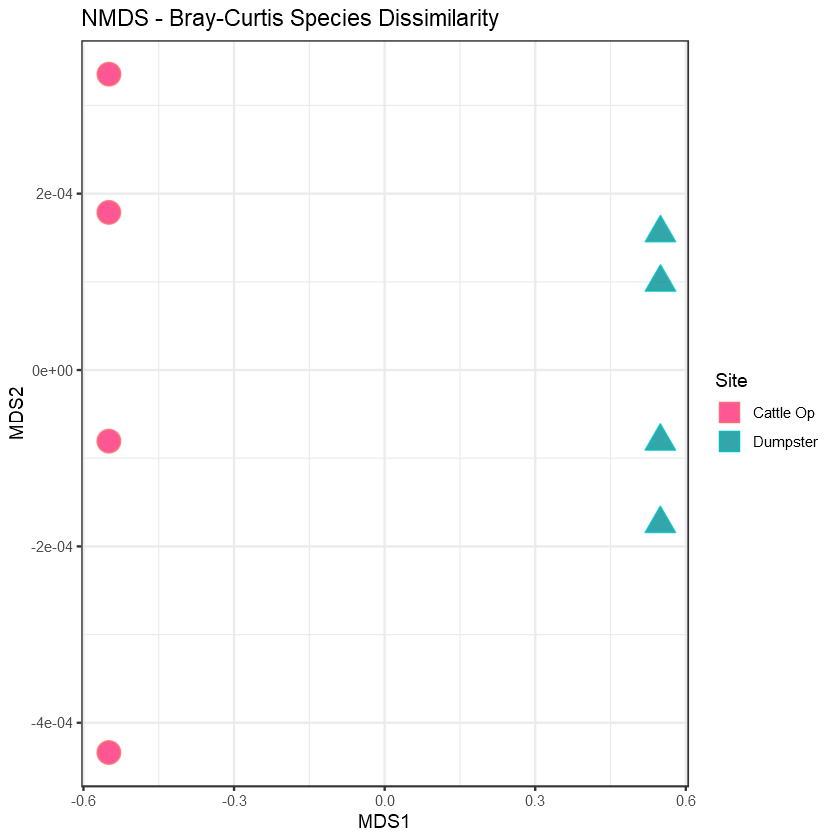

In [30]:
# Let's plot and color according to time point
Shape_list <- list(21, 24)
shape_col <- 'Site'
fill_col <- 'Site'
dot_size <- 7

# plot_dpi
dpi <- 300

# width in Inches of final plot
width <- 6
# heigth in Inches of final plot
heigth <- 6

NMDS1 <- ggplot(nmds_spec_gg, aes(x=MDS1,y=MDS2, shape = !!ensym(shape_col), fill = !!ensym(fill_col)), colour="black", size=dot_size) +
            geom_point(aes(color=Site), size=6, alpha=0.8) +
            scale_shape_manual(values=c(Shape_list), labels=c('Cattle Op', 'Dumpster')) +
            ggtitle("NMDS - Bray-Curtis Species Dissimilarity ") +
            theme(plot.title = element_text(hjust = 0.5)) +
            theme(plot.title = element_text(face = "bold")) +
            theme(axis.text.x=element_text(size=2)) +
            theme(axis.text.y=element_text(size=45)) +
            guides(fill = guide_legend(override.aes = list(shape=22))) +
            theme(axis.title=element_text(size=30,face="bold")) +
            xlab(paste("MDS1")) +
            ylab(paste("MDS2"))  +
            scale_fill_manual(values = c("Cattle Op" = "#ff2c79", "Dumpster" = "#009093")) +
            theme_bw() +
            labs(shape="Site")

## Making output folder structure

if (!dir.exists("plots")){
  dir.create("plots")
}else{
  print("dir exists")
}

if (!dir.exists("plots/nmds")){
  dir.create("plots/nmds")
}else{
  print("dir exists")
}

## Drawing & Saving the plots

plot(NMDS1)
png("plots/nmds/NMDS_1_2.png",width=width,height=heigth,units="in",res=dpi)
print(NMDS1)
dev.off()


In [21]:
set.seed(34521) # set seed for reproducibility

# PERMANOVA
adonis2(brel_spec_gg2_dist ~ Site, data = as.data.frame(nmds_spec_gg))

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Site,1,1.0989184,0.5715064,8.002542,0.03
Residual,6,0.8239271,0.4284936,NA,NA
Total,7,1.9228455,1.0000000,NA,NA
